In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Carga del archivo "train.csv"

In [2]:
datatrain = pd.read_csv('train.csv')
datatrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


1. Determine que columnas poseen faltantes (NA o Nulos),

In [3]:
columnas_nulos=[col for col in datatrain.columns if(datatrain[col].isnull().mean()>0)]
columnas_nulos

['total_bedrooms']

2. Determine la proporción de faltantes para cada columna con faltantes, muestre una
gráfica de barras.

In [4]:
prop_faltantes=datatrain[columnas_nulos].isnull().mean()
prop_faltantes

total_bedrooms    0.009483
dtype: float64

3. Si la variable es numérica realice un análisis de cual sería el mejor método para
realizar la imputación de datos, debe mostrar un bloque de código donde se muestre
cada imputación y su análisis.

In [5]:
##Determinamos el tipo de variable
datatrain[columnas_nulos].dtypes

total_bedrooms    float64
dtype: object

In [6]:
## Analizamos la media y mediana de la variable
media_train=datatrain['total_bedrooms'].mean()
mediana_train=datatrain['total_bedrooms'].median()

print(f"Media: {media_train}")
print(f"Mediana: {mediana_train}")

Media: 537.7787561146051
Mediana: 433.0


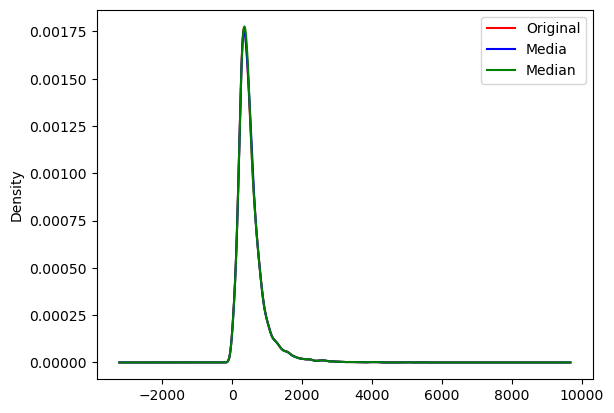

In [7]:
## Creamos nuevas columnas media y mediana para analizar la que mayor o menor impacto tenga al ser sutituida
datatrain['bedrooms_media']=np.round(datatrain['total_bedrooms'].fillna(media_train))
datatrain['bedrooms_mediana']=np.round(datatrain['total_bedrooms'].fillna(mediana_train))

fig=plt.figure()
ax=fig.add_subplot(111)

datatrain['total_bedrooms'].plot.density(color='red', label='Original')
datatrain['bedrooms_media'].plot.density(color='blue', label='Media')
datatrain['bedrooms_mediana'].plot.density(color='green', label='Median')

ax.legend()

In [8]:
datatrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_media,bedrooms_mediana
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN,358.0,358.0
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND,109.0,109.0
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN,184.0,184.0
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY,24.0,24.0
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN,1352.0,1352.0


In [9]:
##Siendo que no tiene impacto el uso de 1 u otra imputaremos con la "media"

datatrain['total_bedrooms']=np.round(datatrain['bedrooms_media'].fillna(media_train))

In [10]:
## Eliminamos las variables "bedroom_media y bedroom_mediana", creadas para analisis
datatrain = datatrain.drop(["bedrooms_media", "bedrooms_mediana"], axis=1)

In [11]:
## Revalidamos que ya no existan variables "nulas"
columnas_nulos=[col for col in datatrain.columns if(datatrain[col].isnull().mean()>0)]
columnas_nulos

[]

4. Si la variable es categórica, realice una imputación que considere necesaria.
** La variable *NO* es categorica**

5. Realice la codificación de variables categóricas, determine cual es le mejor enfoque
para cada caso, recuerde que puede realizar los siguientes enfoques:

In [12]:
## Validamos el tipo de variable en el dataset para determinar cuales son categoricas
datatrain.dtypes

id                      int64
longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [15]:
## Aunque por la cantidad de columnas se puede ver que solamente es una revalidamos ejecutando una busqueda de variables tipo "object"
col_categoricas=[]
colnames=datatrain.columns
for col in colnames:
    if(datatrain[col].dtype=='object'):
        col_categoricas.append(col)
col_categoricas

['ocean_proximity']

In [17]:
##Validamos los valores unicos de la columna categorica
datatrain['ocean_proximity'].value_counts().sort_values(ascending=False)


<1H OCEAN     6384
INLAND        4577
NEAR OCEAN    1865
NEAR BAY      1619
ISLAND           2
Name: ocean_proximity, dtype: int64

In [18]:
## Debido a la alta cardinalidad de la variable se toma la decision de utilizar *FREQUENCY ENCODING*
oceanprox_frecuency=(datatrain['ocean_proximity'].value_counts().sort_values(ascending=False)).to_dict()
oceanprox_frecuency

{'<1H OCEAN': 6384,
 'INLAND': 4577,
 'NEAR OCEAN': 1865,
 'NEAR BAY': 1619,
 'ISLAND': 2}

In [19]:
datatrain['oceanprox_frecuency']=datatrain['ocean_proximity'].map(oceanprox_frecuency)
datatrain[['oceanprox_frecuency','ocean_proximity']]

,oceanprox_frecuency,ocean_proximity
0,6384,<1H OCEAN
1,4577,INLAND
2,6384,<1H OCEAN
3,1619,NEAR BAY
4,6384,<1H OCEAN
...,...,...
14442,1619,NEAR BAY
14443,1865,NEAR OCEAN
14444,4577,INLAND
14445,4577,INLAND


In [61]:
datatrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,oceanprox_frecuency
0,9744,0.265265,0.449522,0.274510,0.055674,0.055400,0.040056,0.054103,0.296341,0.438145,<1H OCEAN,6384
1,13893,0.803804,0.168969,0.705882,0.011445,0.016760,0.006232,0.009538,0.222707,0.104744,INLAND,4577
2,18277,0.223223,0.510096,0.666667,0.029757,0.028399,0.017717,0.028614,0.472835,1.000000,<1H OCEAN,6384
3,16176,0.191191,0.552604,1.000000,0.003154,0.003569,0.001085,0.004276,0.670784,0.432990,NEAR BAY,1619
4,8843,0.592593,0.164718,0.529412,0.101709,0.209652,0.062780,0.200460,0.143343,0.531752,<1H OCEAN,6384


6. Para todas las variables resultantes realice Feature Scaling según lo considere más
pertinente.

In [62]:
## Importamos las librerias que utilizaremos
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [63]:
## Definimos las categorias existentes dentro de nuestro dataset 
dataset=datatrain

def getColumnTypes(dataset):
    '''Esta funcion extrae el tipo de dominio de lsa columnas de un dataset.
        Entradas: Pandas Dataframe
        Salida: Tupla con arreglo que contiene nombres de las columnas'''
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64'or dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)

    return continuas, discretas, categoricas  

In [64]:
## Identificamos las columnas que se asignaran a cada categoria definida en el punto anterior
continuas, discretas, categoricas=getColumnTypes(datatrain)
print(f"continuas: {continuas}")
print(f"discretas: {discretas}")
print(f"categoricas: {categoricas}")

continuas: ['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
discretas: ['oceanprox_frecuency']
categoricas: ['ocean_proximity']


In [65]:
## Realizamos una copia del dataset conteniendo unicamente las variables continuas
datatrain_temp=datatrain.copy()[continuas]

In [66]:
## el codigo crea una variable escaler donde se transformaran los datos de nuestro dataset original a una escala que sea comparable entre variables
scaler=StandardScaler()
scaler.fit(datatrain_temp)# calculamos la media  desviacion estandard de la columna datatrain_temp


datatrain_scaled=scaler.transform(datatrain_temp)
datatrain_scaled=pd.DataFrame(datatrain_scaled, columns=datatrain_temp.columns)

In [67]:
## generamos una vista de las columnas con el scaler aplicado
datatrain_scaled.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04
mean,-3.627610e-17,1.826677e-17,-9.859598e-18,-3.254238e-16,-4.107525e-18,-1.042770e-16,-2.832694e-16,-6.005287e-17,-1.388259e-17,-4.834279e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.724790e+00,-2.355735e+00,-1.452625e+00,-2.212627e+00,-1.188731e+00,-1.272046e+00,-1.262951e+00,-1.292484e+00,-1.777237e+00,-1.664713e+00
25%,-8.621810e-01,-1.110378e+00,-8.017092e-01,-8.617895e-01,-5.377766e-01,-5.705945e-01,-5.688125e-01,-5.700018e-01,-6.851026e-01,-7.571904e-01
50%,-1.098754e-02,5.392830e-01,-6.471751e-01,1.228189e-02,-2.321621e-01,-2.411969e-01,-2.333120e-01,-2.385403e-01,-1.737847e-01,-2.357601e-01
75%,8.684923e-01,7.788706e-01,9.730907e-01,6.479701e-01,2.267111e-01,2.517146e-01,2.641541e-01,2.703048e-01,4.537598e-01,5.008360e-01
max,1.739914e+00,2.630684e+00,2.953936e+00,1.839886e+00,1.656038e+01,1.399873e+01,2.415321e+01,1.445452e+01,5.883260e+00,2.543186e+00


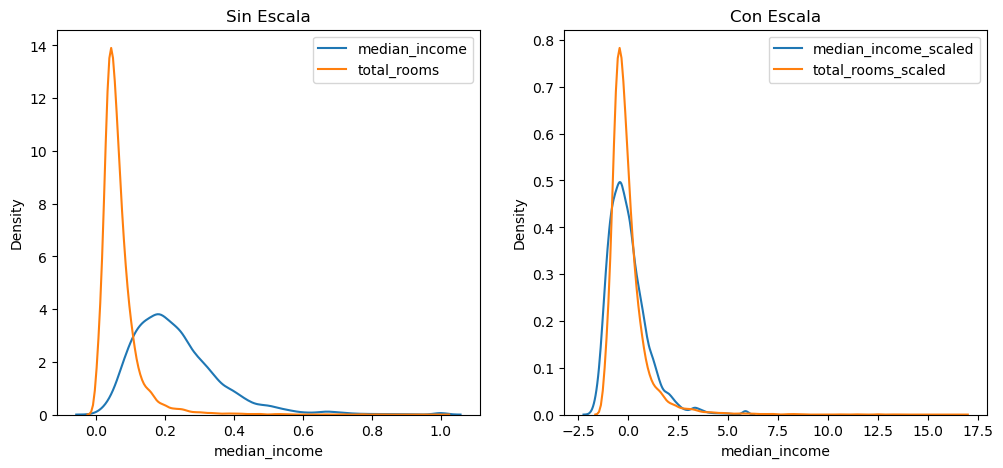

In [68]:
## Comparamos columnas para ver el impacto de el dataset original y luego como las variables con scaler son comparables entre si

fig,(ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Sin Escala")
sns.kdeplot(datatrain_temp['median_income'], ax=ax1, label="median_income")
sns.kdeplot(datatrain_temp['total_rooms'], ax=ax1, label="total_rooms")

ax2.set_title("Con Escala")
sns.kdeplot(datatrain_scaled['median_income'], ax=ax2, label="median_income_scaled")
sns.kdeplot(datatrain_scaled['total_rooms'], ax=ax2, label="total_rooms_scaled")

ax1.legend()
ax2.legend()

plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Separar la variable objetivo y las características
X = datatrain.drop("ocean_proximity", axis=1)
y = datatrain["median_income"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión de Bosques Aleatorios
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el RMSE en el conjunto de prueba
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.00024121654831640776
